In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/climate-data.csv')

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
for i in range(3,0,-1):
  for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    df[f'{col}lag_{i}'] = df[col].shift(i)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df = df.set_index('date')

In [ ]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemplag_3,humiditylag_3,wind_speedlag_3,meanpressurelag_3,meantemplag_2,humiditylag_2,wind_speedlag_2,meanpressurelag_2,meantemplag_1,humiditylag_1,wind_speedlag_1,meanpressurelag_1
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000


In [ ]:
y = df['meantemp']

In [ ]:
df.drop(columns=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)

In [ ]:
df.head()

,meantemplag_3,humiditylag_3,wind_speedlag_3,meanpressurelag_3,meantemplag_2,humiditylag_2,wind_speedlag_2,meanpressurelag_2,meantemplag_1,humiditylag_1,wind_speedlag_1,meanpressurelag_1
date,,,,,,,,,,,,
2013-01-04,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2013-01-06,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
2013-01-07,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
2013-01-08,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000


In [ ]:
X=df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, shuffle=False, test_size=0.1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],3,(X_train.shape[1]//3))
X_test = X_test.reshape(X_test.shape[0],3,(X_test.shape[1]//3))

In [ ]:
from keras import layers
from keras.layers import LSTM, Dense
from keras.models import Sequential
from tensorflow import keras

In [ ]:
X_train.shape

(1313, 3, 4)

In [ ]:
ANN = [
    layers.LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu', return_sequences=True),
    layers.LSTM(64, activation='relu'),
    layers.Dense(1, activation='linear')
]

In [ ]:
model = Sequential(ANN)

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/10
33/33 [==============================] - 4s 33ms/step - loss: 684.5574 - mean_squared_error: 684.5574 - mean_absolute_error: 25.1495 - val_loss: 693.1187 - val_mean_squared_error: 693.1187 - val_mean_absolute_error: 25.0334
Epoch 2/10
33/33 [==============================] - 0s 14ms/step - loss: 343.3517 - mean_squared_error: 343.3517 - mean_absolute_error: 15.8428 - val_loss: 60.3030 - val_mean_squared_error: 60.3030 - val_mean_absolute_error: 6.6943
Epoch 3/10
33/33 [==============================] - 0s 11ms/step - loss: 35.1518 - mean_squared_error: 35.1518 - mean_absolute_error: 4.7398 - val_loss: 23.1300 - val_mean_squared_error: 23.1300 - val_mean_absolute_error: 3.9733
Epoch 4/10
33/33 [==============================] - 0s 11ms/step - loss: 20.9833 - mean_squared_error: 20.9833 - mean_absolute_error: 3.6634 - val_loss: 14.8531 - val_mean_squared_error: 14.8531 - val_mean_absolute_error: 3.0759
Epoch 5/10
33/33 [==============================] - 0s 9ms/step - loss: 14.

In [ ]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

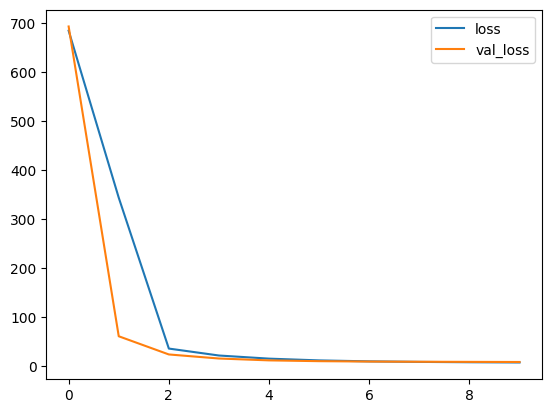

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 3, 100)            42000     
                                                                 
 lstm_8 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84305 (329.32 KB)
Trainable params: 84305 (329.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(pred,y_test)
r2= r2_score(pred, y_test)
mae = mean_absolute_error(y_test, pred)

In [ ]:
print('MSE:', mse)
print('R2:', r2)
print('MAE:', mae)

MSE: 3.2059865754721426
R2: 0.9057392090246629
MAE: 1.3939645475219338


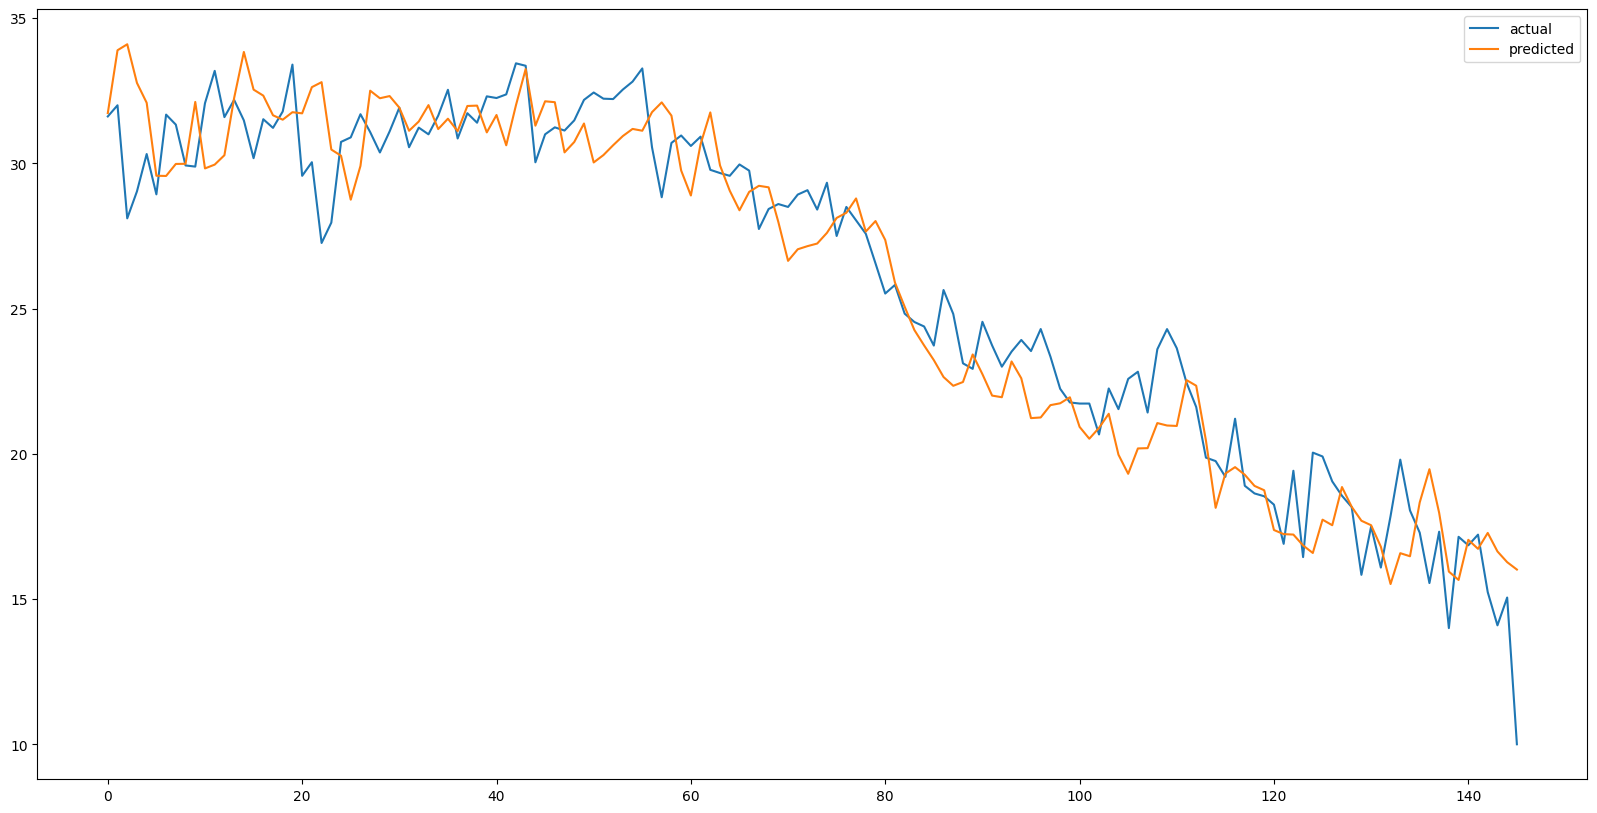

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values , label='actual')
plt.plot(pred , label='predicted')
plt.legend()
plt.show()

In [ ]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'
